# **Część 0.** Pobranie i analiza zbioru
---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## **0.1.** Sprawdzenie wartości Price (+ Odstających wartości)

In [ ]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
def check_nulls(df):
    return pd.DataFrame({"values_null": df.isnull().sum(),
                         "percentage_null": df.isnull().sum() / df.shape[0] * 100})
    
check_nulls(df)

,values_null,percentage_null
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


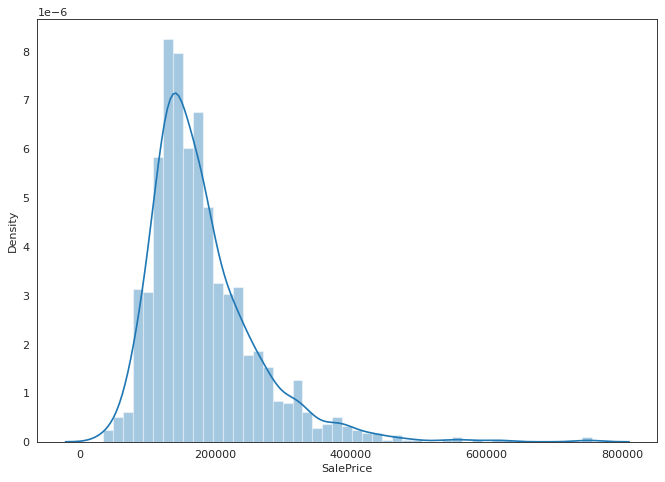

In [ ]:
sns.set_style("white")
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df['SalePrice']);

In [ ]:
df[df['SalePrice']>=400000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
161,162,60,RL,110.0,13688,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,412500
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
231,232,60,RL,174.0,15138,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,403000
278,279,20,RL,107.0,14450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,New,Partial,415298
349,350,60,RL,56.0,20431,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,New,Partial,437154
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
473,474,20,RL,110.0,14977,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,440000


## **0.2.** Sprawdzenie korelacji Ceny z innymi wartościami w data frame

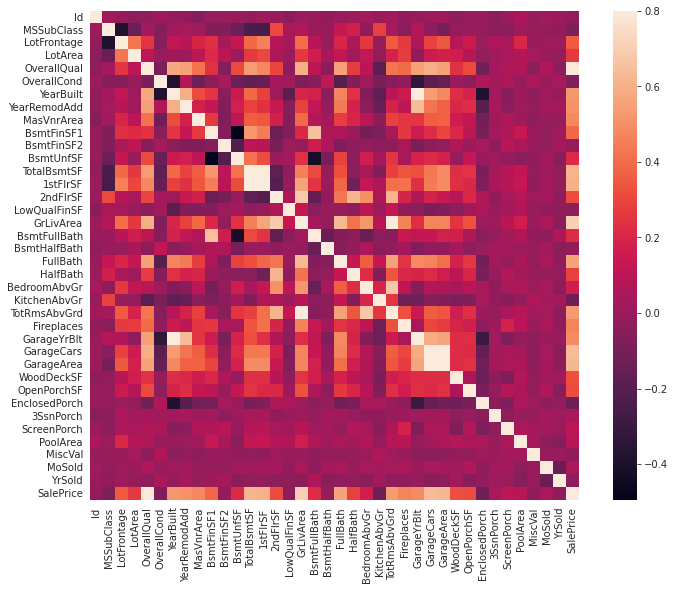

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (20, 15)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

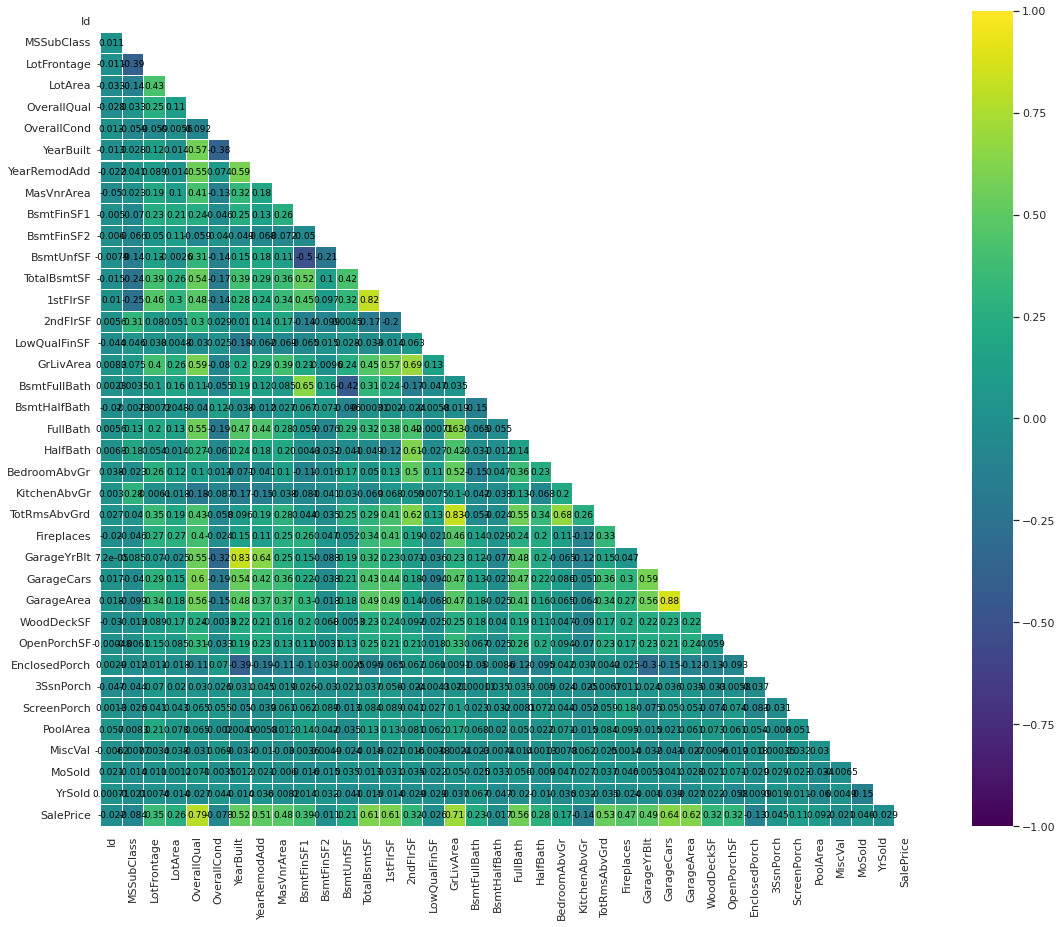

In [ ]:
mask = np.triu(np.ones_like(corrmat, dtype=bool))
cmap = "viridis"
sns.heatmap(corrmat, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

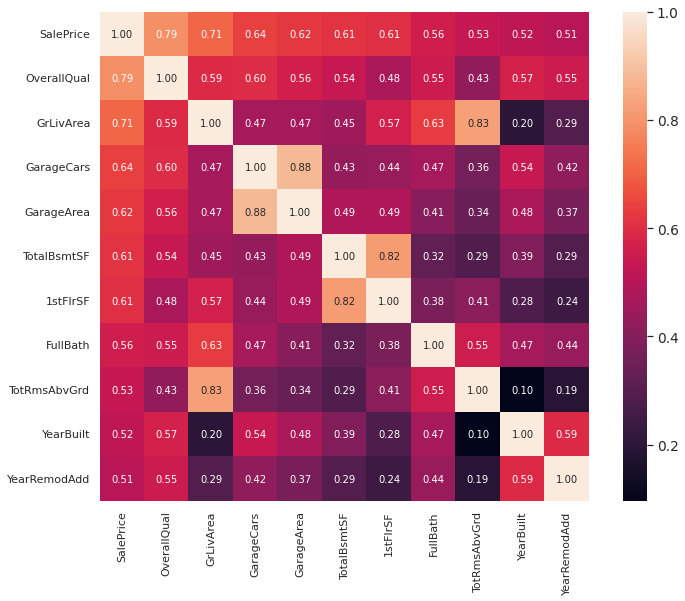

In [ ]:
k = 11 #Wybieramy 10 najważniejszych kolumn
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Najważniejsze czynniki:
- OverallQual: Rates the overall material and finish of the house
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- FullBath: Full bathrooms above grade
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- YearBuilt: Original construction date
- YearRemodAdd: Remodel year

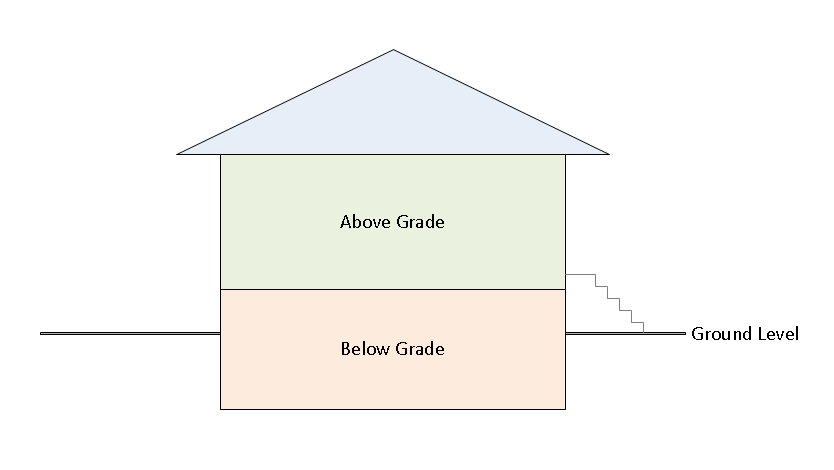

## **0.3.** Analiza najważniejszych kolumn skorelowanych z ceną mieszkania

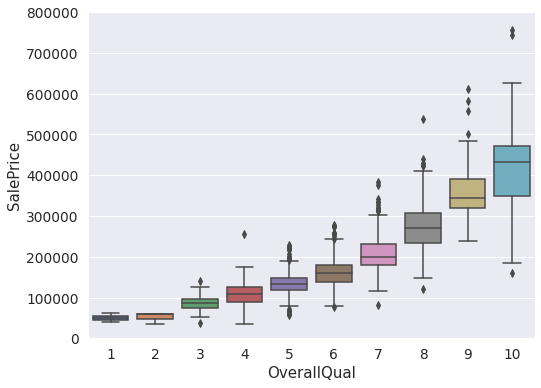

In [ ]:
#1 Overall Quality
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


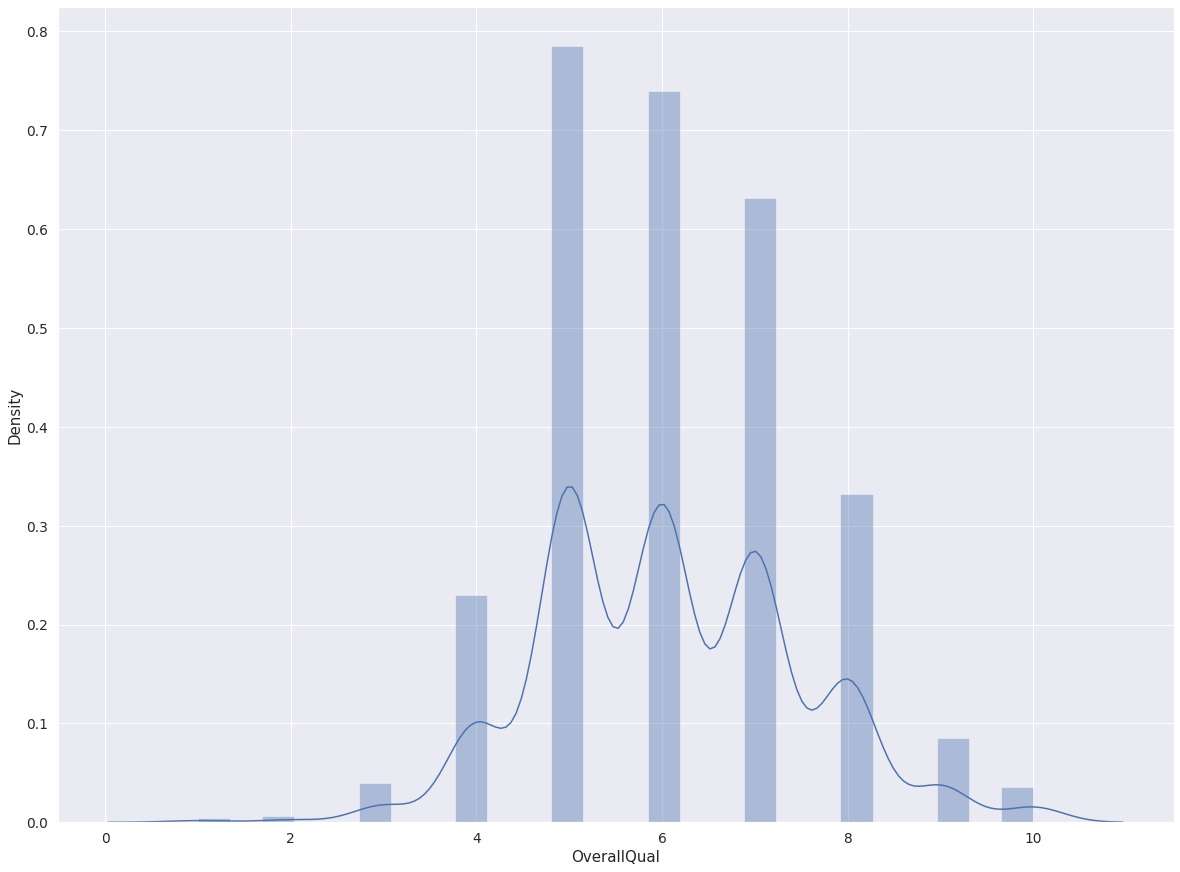

In [ ]:
sns.distplot(df['OverallQual']);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


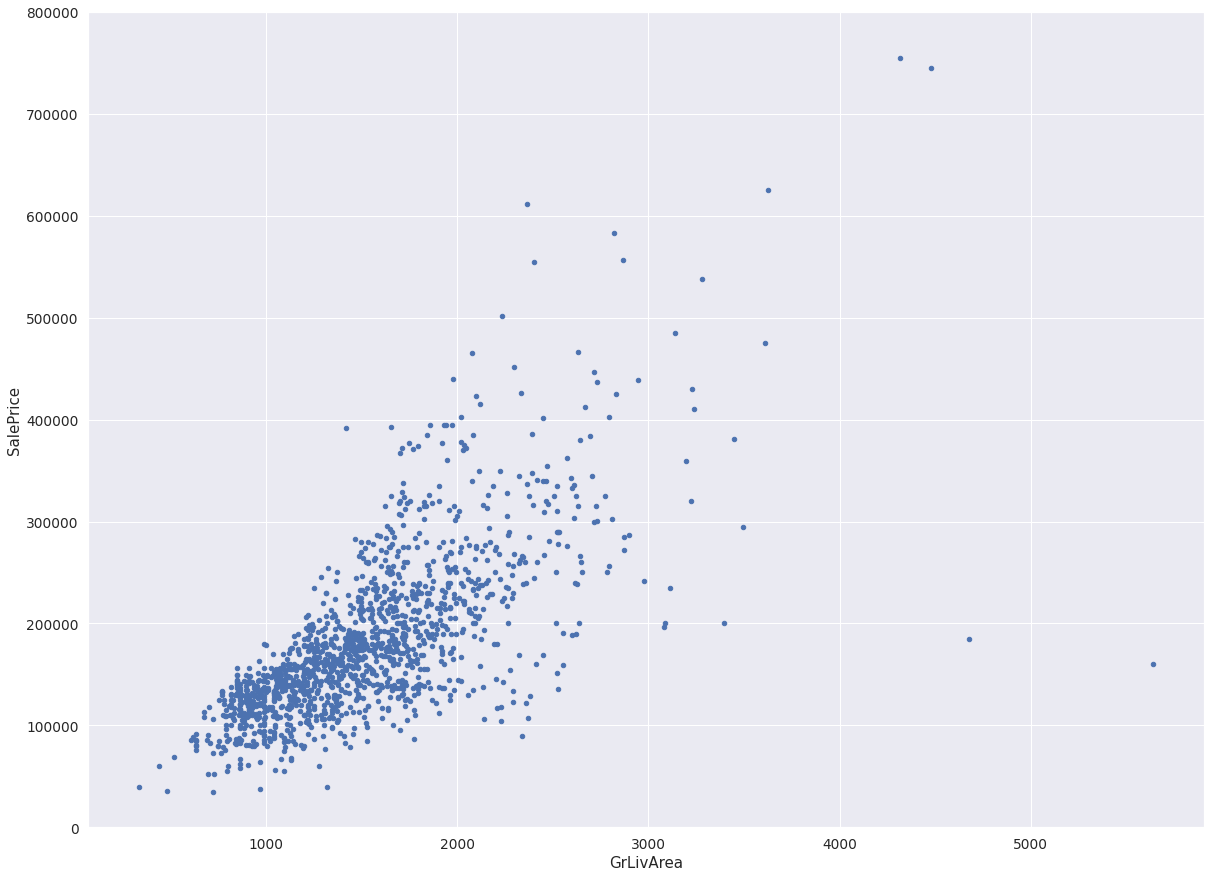

In [ ]:
#2 Ground level living area in Sq Feet
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


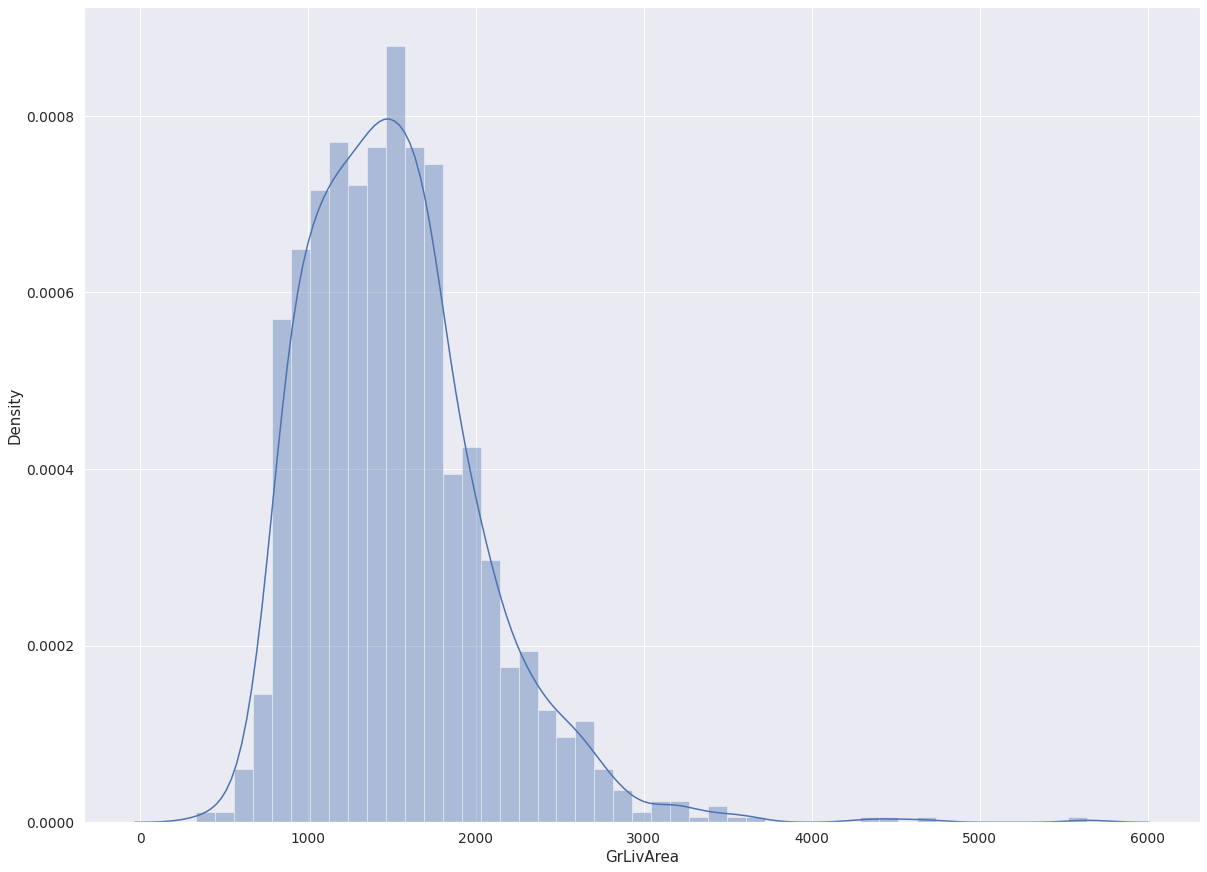

In [ ]:
sns.distplot(df['GrLivArea']);

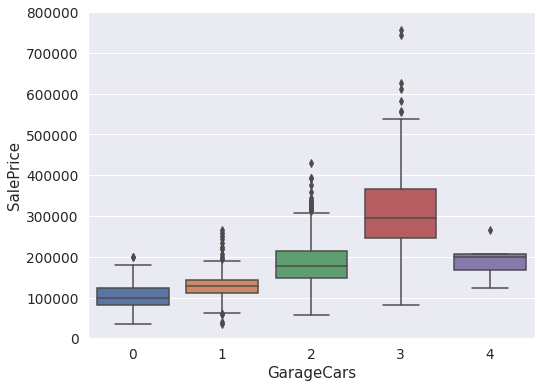

In [ ]:
#3 GarageCars
var = 'GarageCars'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


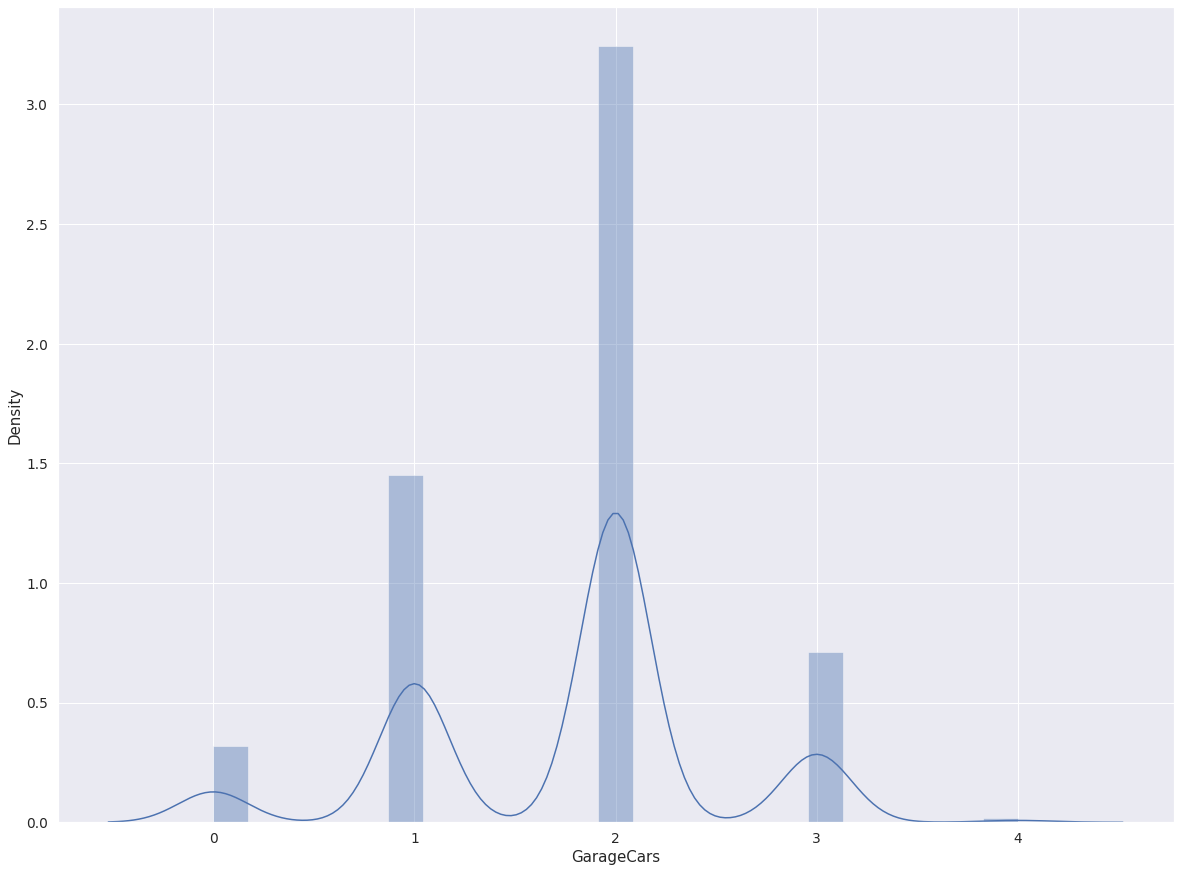

In [ ]:
sns.distplot(df['GarageCars']);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


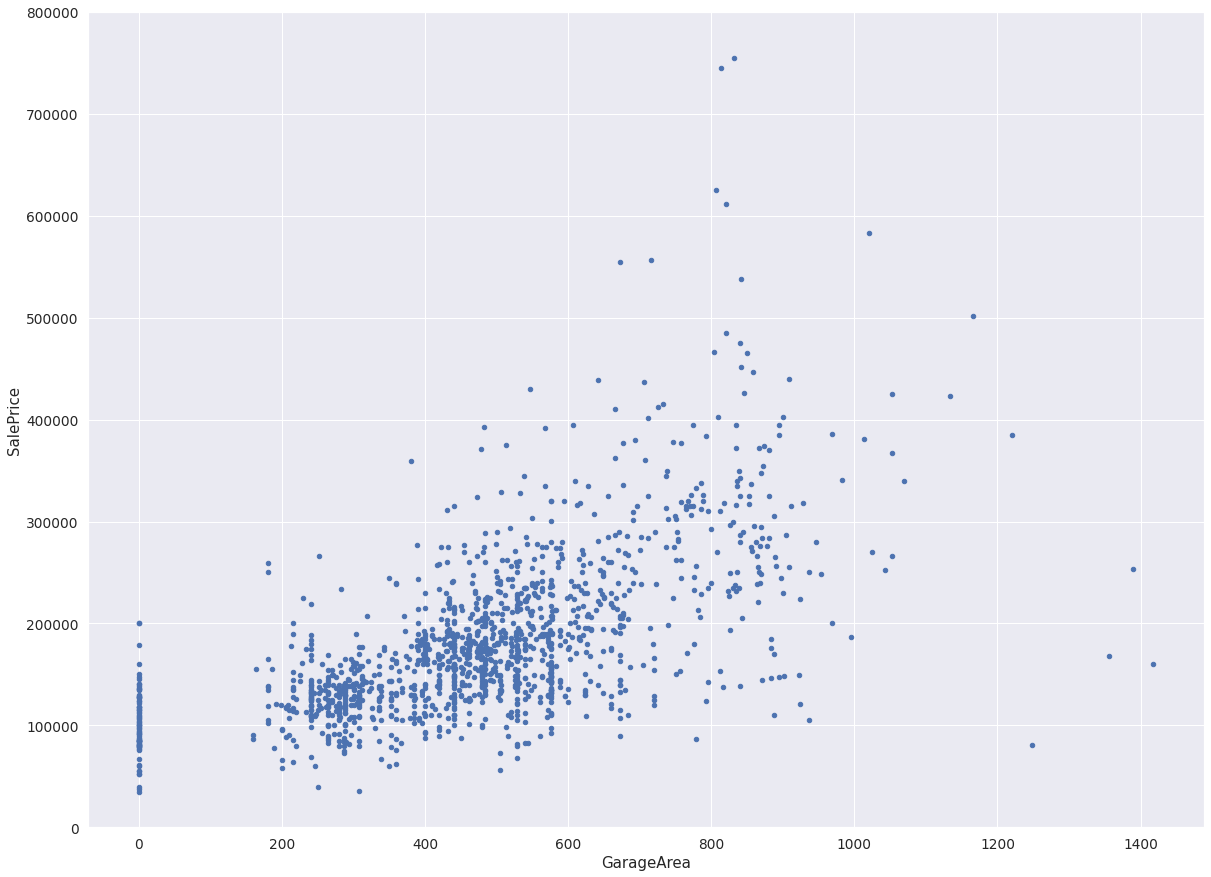

In [ ]:
#4 Grg Area
var = 'GarageArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


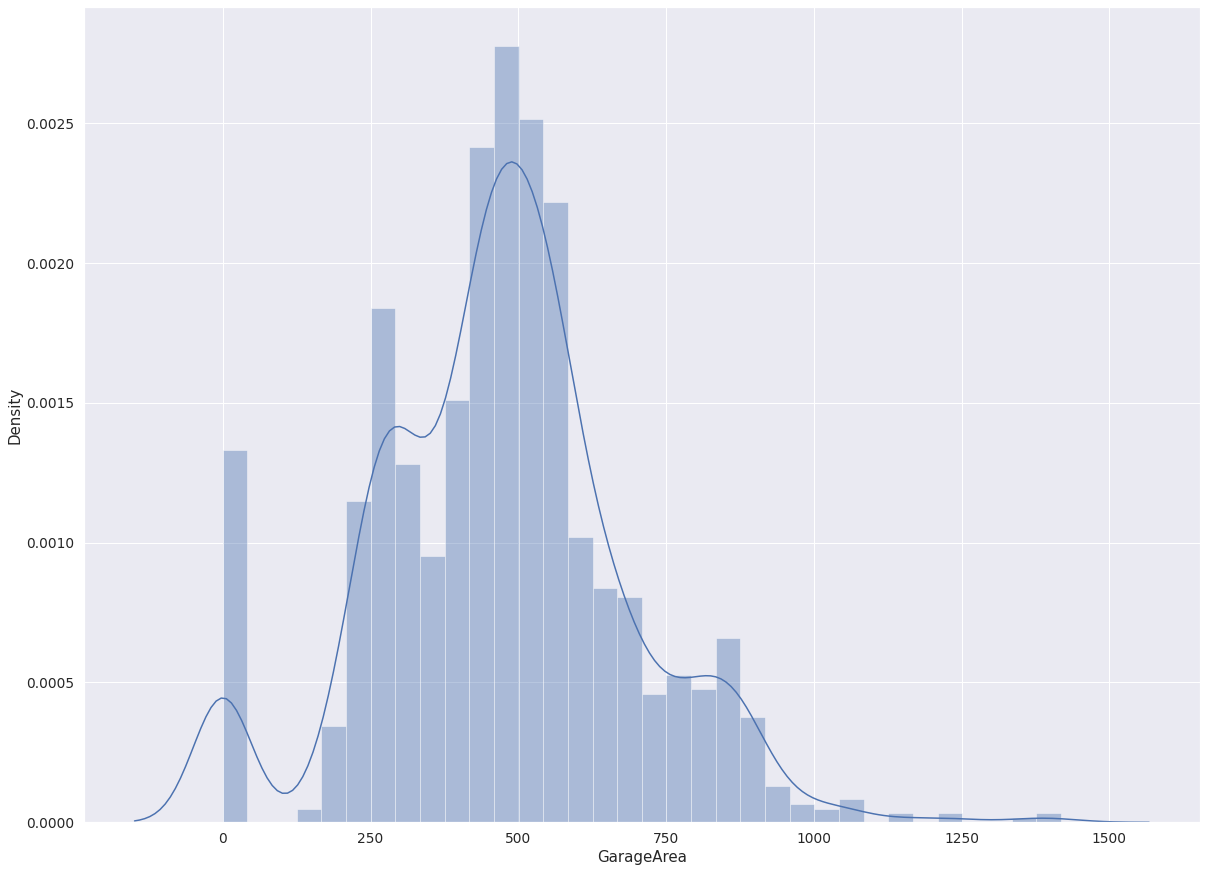

In [ ]:
sns.distplot(df['GarageArea']);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


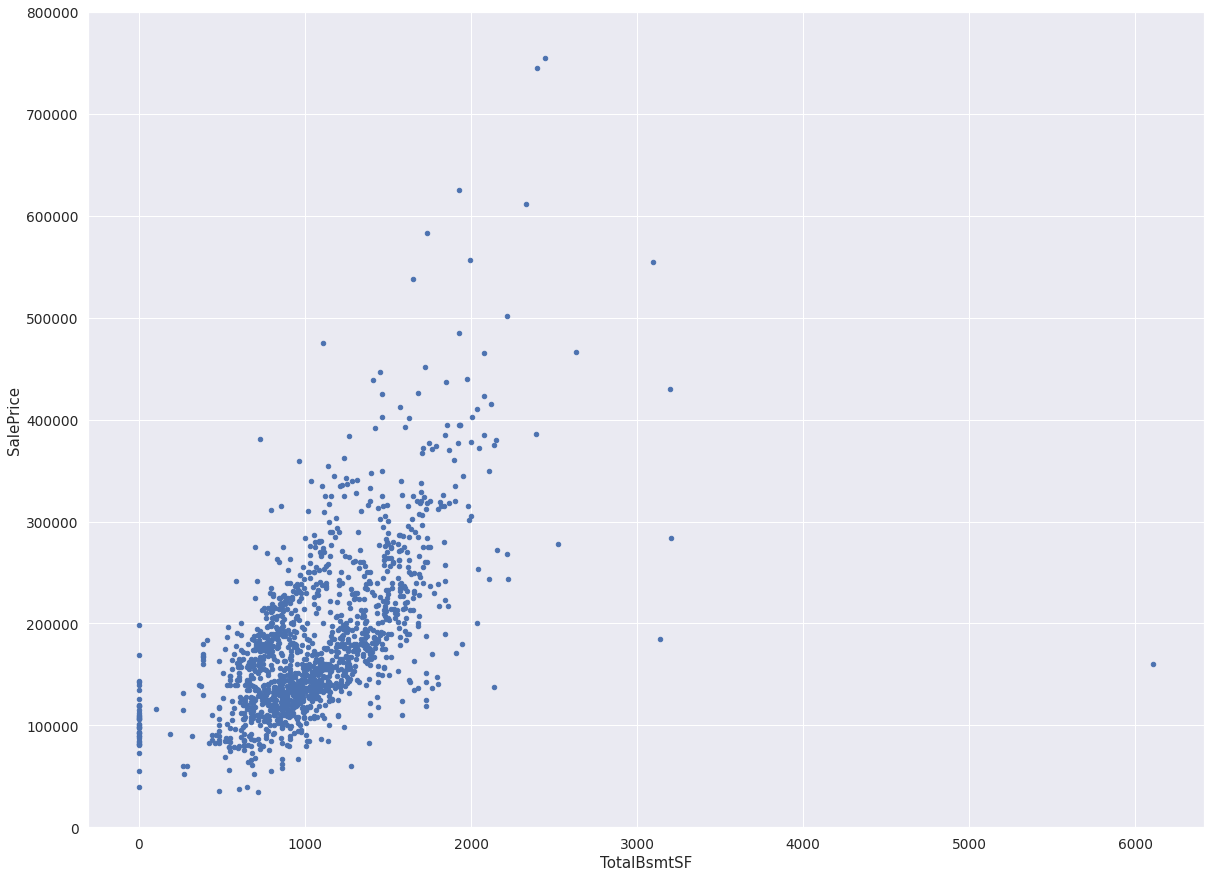

In [ ]:
#5 TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


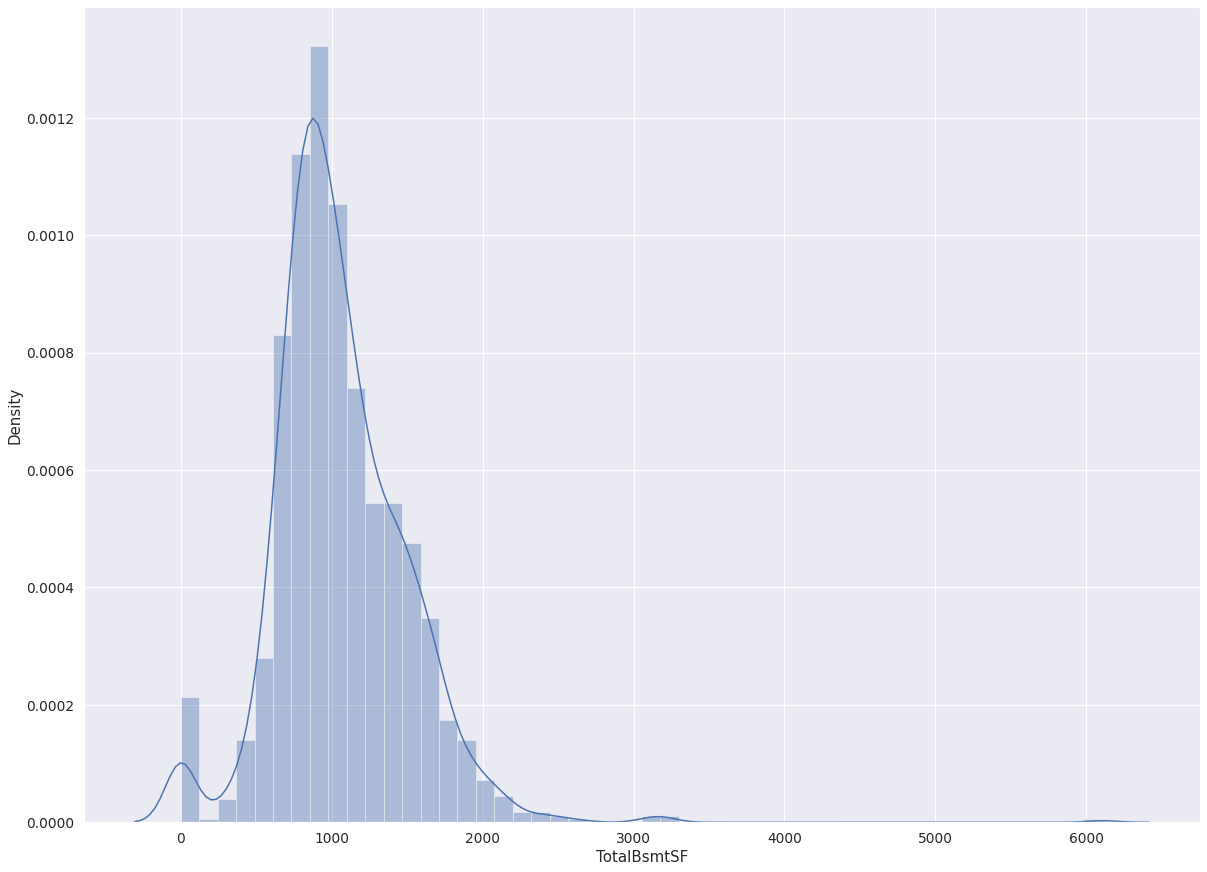

In [ ]:
sns.distplot(df['TotalBsmtSF']);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


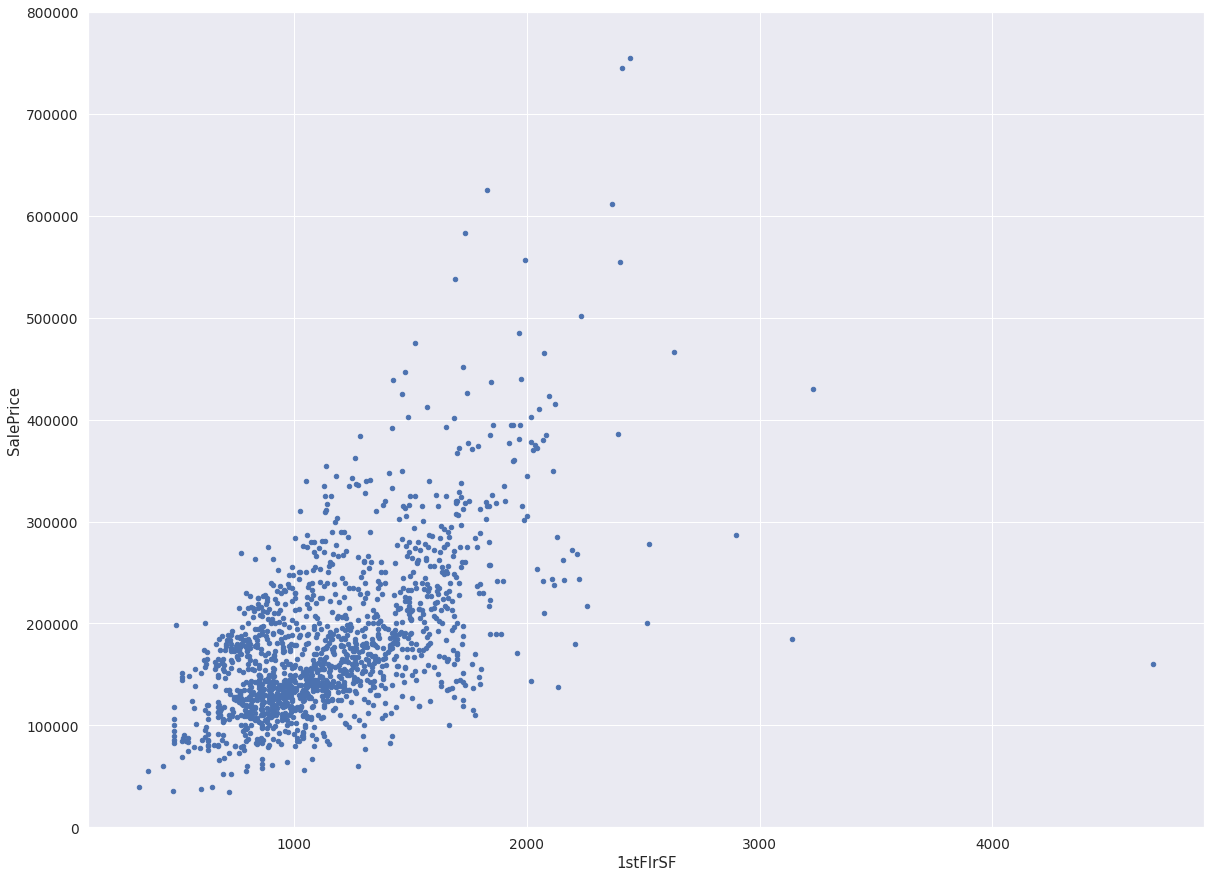

In [ ]:
#6 1st floor sqr ft
var = '1stFlrSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


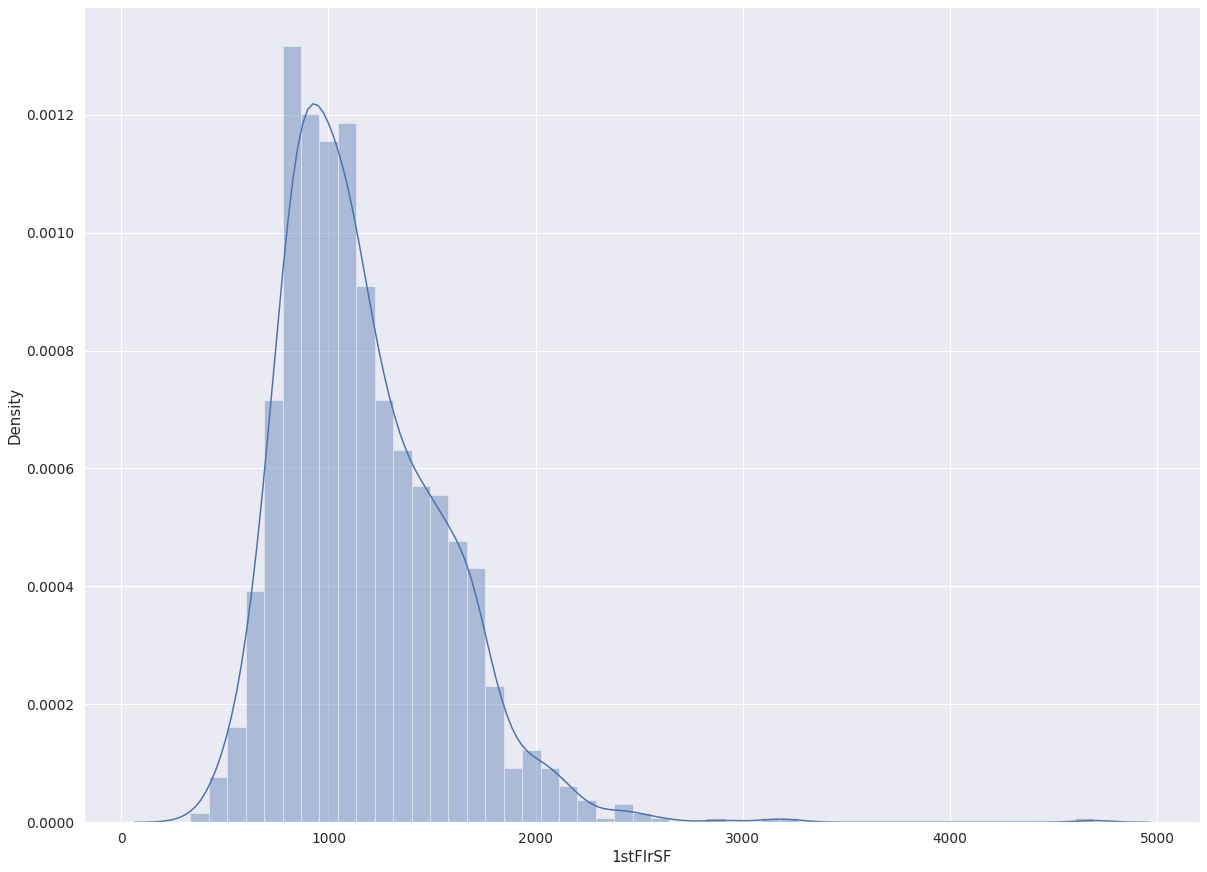

In [ ]:
sns.distplot(df['1stFlrSF']);

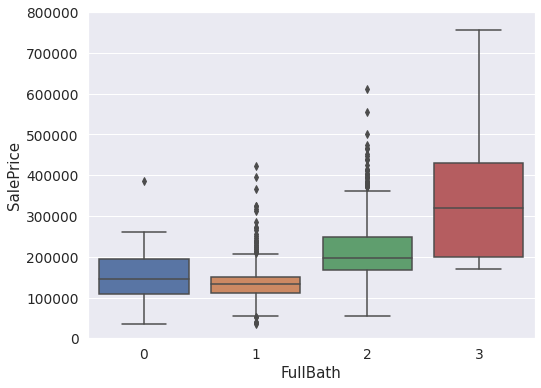

In [ ]:
#7 bath abv grade
var = 'FullBath'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

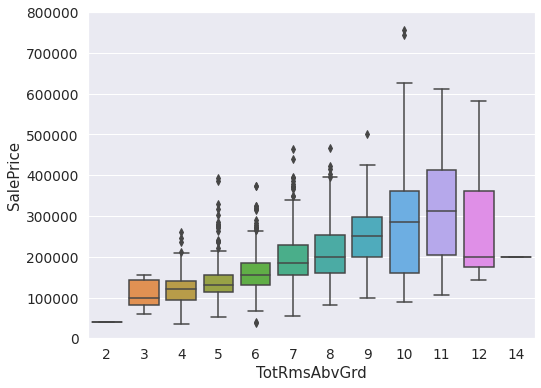

In [ ]:
#8 TotRmsAbvGrd
var = 'TotRmsAbvGrd'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


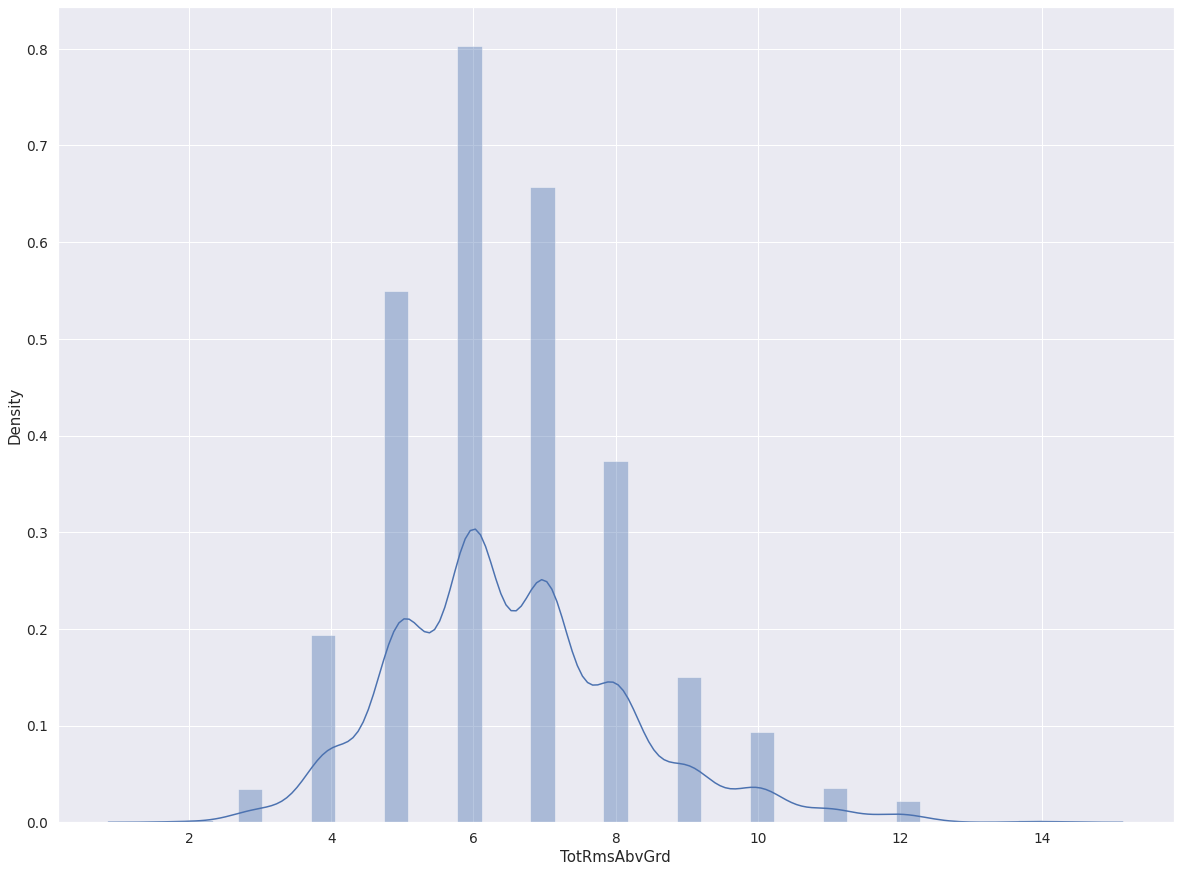

In [ ]:
sns.distplot(df['TotRmsAbvGrd']);

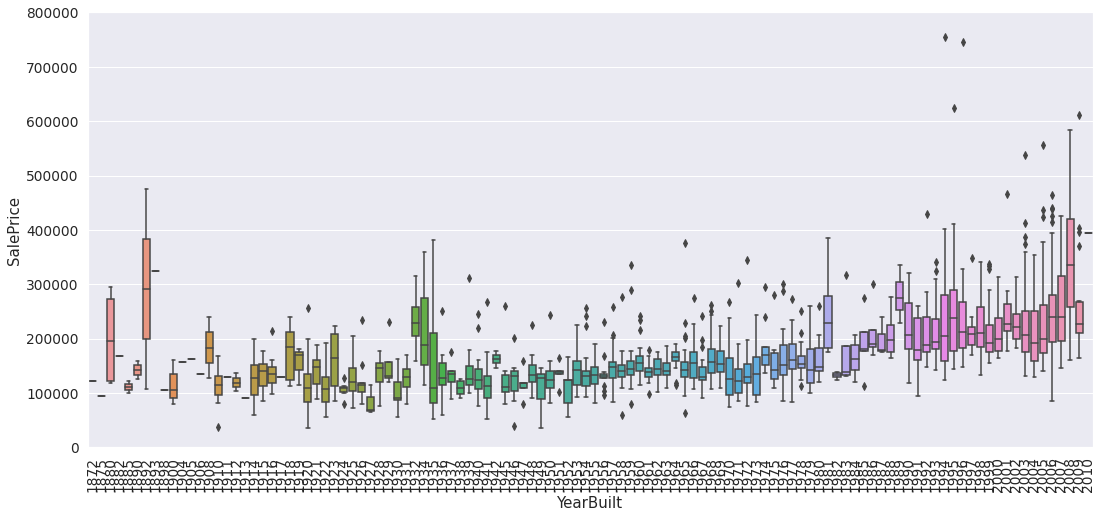

In [ ]:
#9 TotalBsmtSF
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


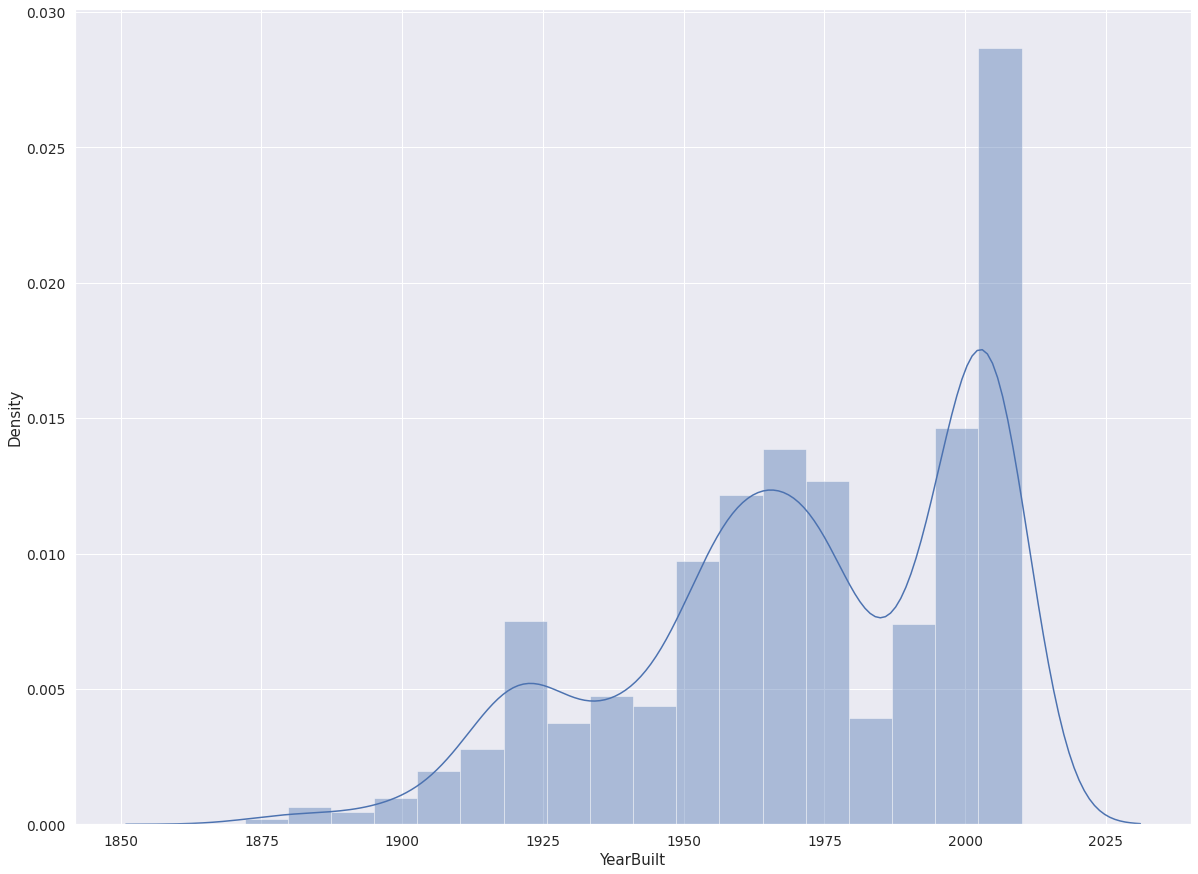

In [ ]:
sns.distplot(df['YearBuilt']);

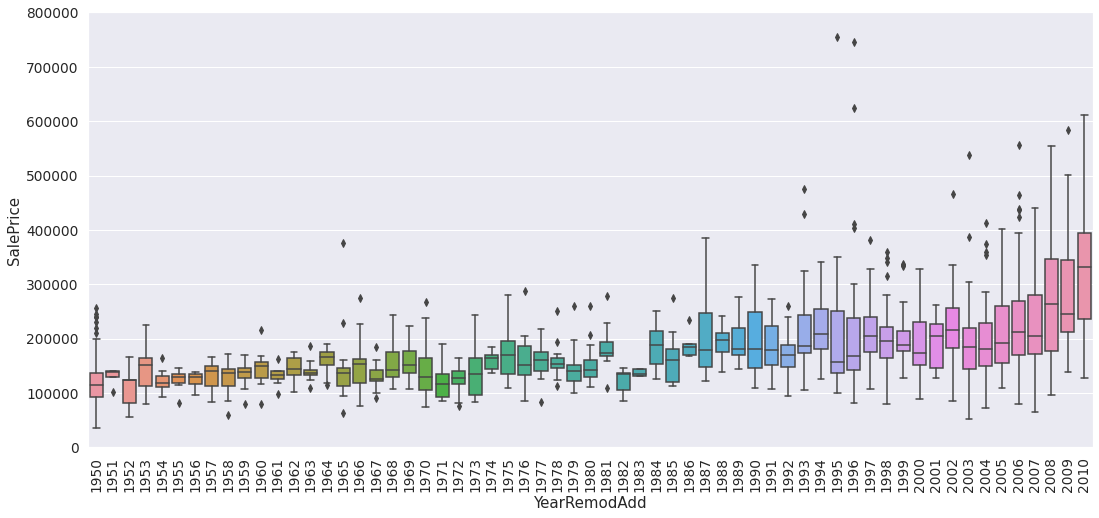

In [ ]:
#10 YearRemodAdd: Remodel date
var = 'YearRemodAdd'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


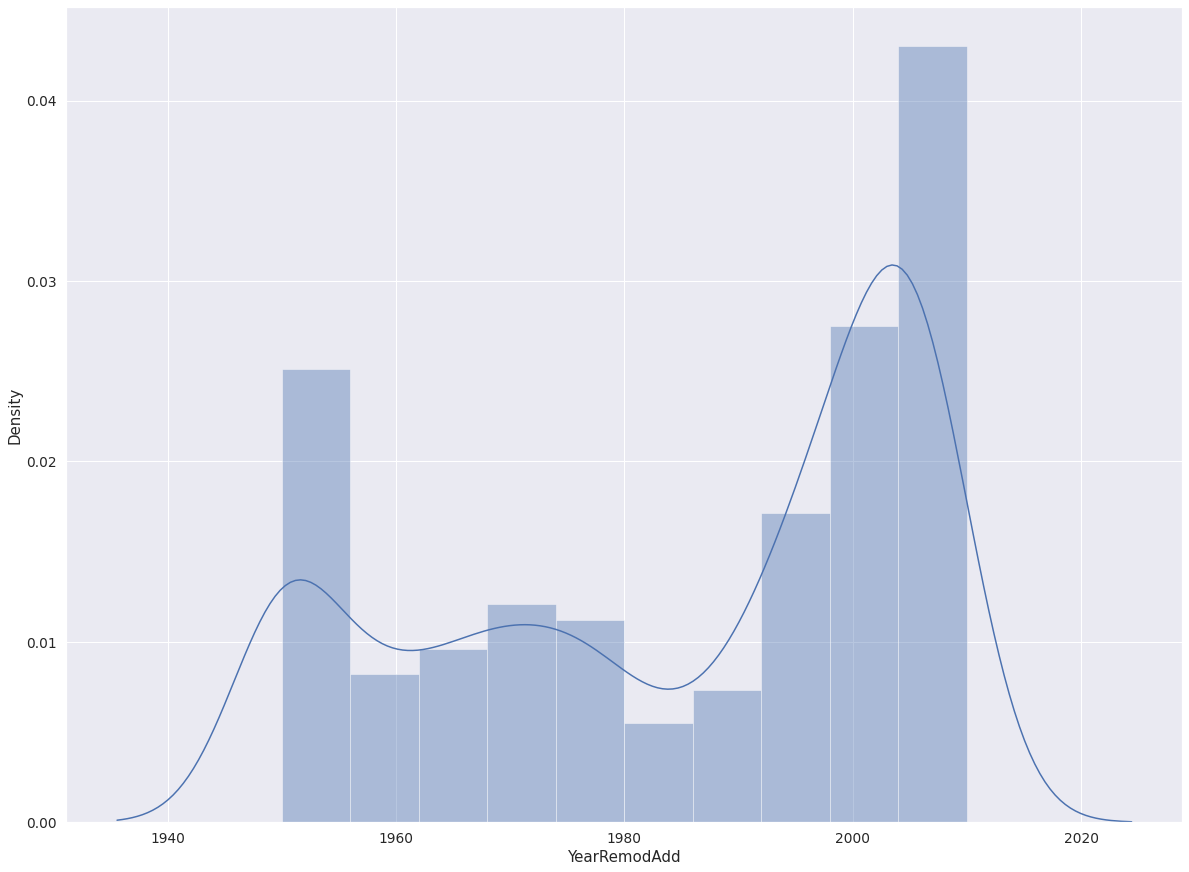

In [ ]:
sns.distplot(df['YearRemodAdd']);

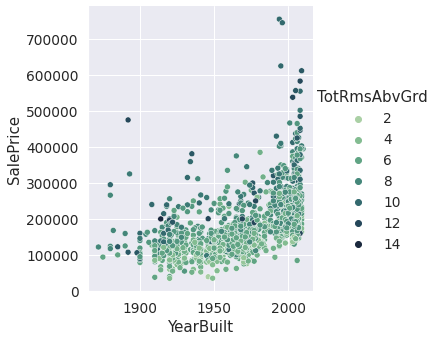

In [ ]:
sns.relplot(x='YearBuilt', y='SalePrice', hue="TotRmsAbvGrd", palette="ch:r=-.5,l=.75", data=df);

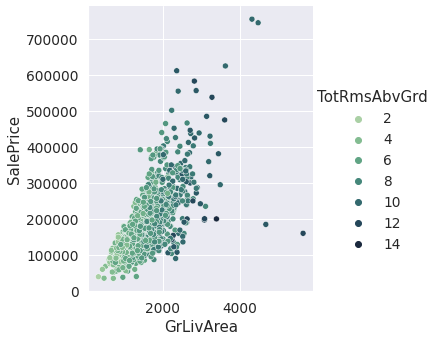

In [ ]:
sns.relplot(x='GrLivArea', y='SalePrice', hue="TotRmsAbvGrd", palette="ch:r=-.5,l=.75", data=df);

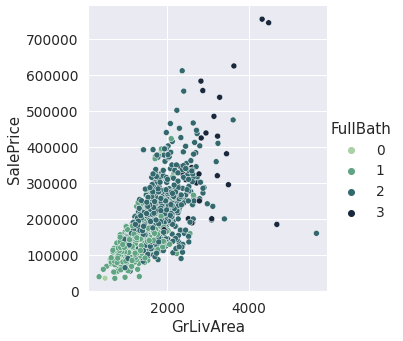

In [ ]:
sns.relplot(x='GrLivArea', y='SalePrice', hue="FullBath", palette="ch:r=-.5,l=.75", data=df);


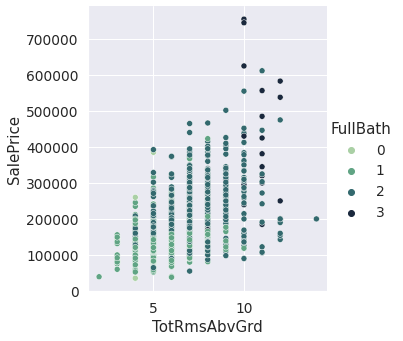

In [ ]:
sns.relplot(x='TotRmsAbvGrd', y='SalePrice', hue="FullBath", palette="ch:r=-.5,l=.75", data=df);

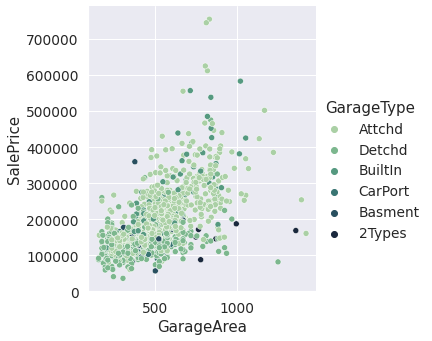

In [ ]:
sns.relplot(x='GarageArea', y='SalePrice', hue="GarageType", palette="ch:r=-.5,l=.75", data=df);

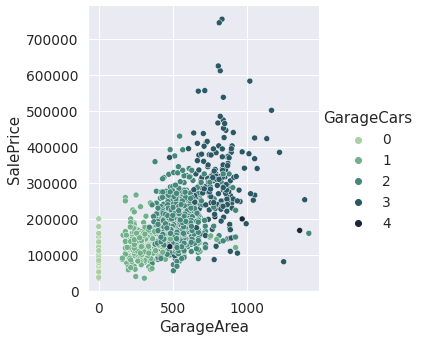

In [ ]:
sns.relplot(x='GarageArea', y='SalePrice', hue="GarageCars", palette="ch:r=-.5,l=.75", data=df);

# X. Lin Reg

In [ ]:
df_x = df[['OverallQual','GrLivArea','GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath','TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]
df_y = df[['SalePrice']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y , test_size=0.2,train_size=0.8, random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In general, the higher the R-squared, the better the model fits your data.

In [ ]:
r_sq = model.score(x_test, y_test)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8052205799818479


In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
import math

MSE = np.square(np.subtract(y_test,y_predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

35554.46134000482


In [ ]:
y_test_np = y_test.to_numpy()

In [ ]:
y_test_np.dtype

dtype('int64')

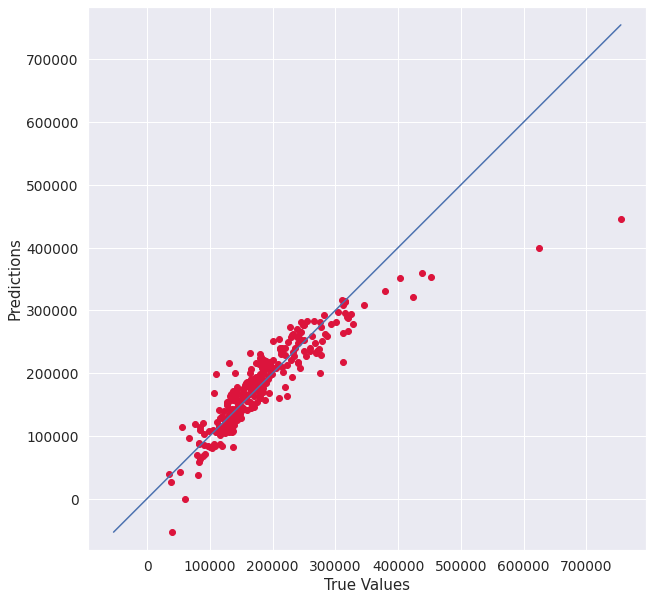

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test_np, y_predicted, c='crimson')

p1 = max(max(y_predicted), max(y_test_np))
p2 = min(min(y_predicted), min(y_test_np))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
x_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
756,8,1768,2,578,866,866,2,7,2007,2007
923,6,1617,2,533,1604,1617,2,5,1993,1994
1423,6,2201,2,432,697,1575,2,8,1966,1966
217,4,1328,1,210,686,810,1,8,1925,1950
653,6,1469,1,216,756,756,1,7,1906,1995
...,...,...,...,...,...,...,...,...,...,...
626,5,1422,1,286,978,1422,1,6,1960,1978
1254,7,1656,2,397,746,760,2,7,2003,2004
1041,6,1632,2,484,800,800,1,7,1966,2000
432,5,1365,2,440,765,765,1,6,1971,1971


In [ ]:
y_predicted

array([[240414.07532177],
       [207197.12843476],
       [200669.89001696],
       [ 87545.21162434],
       [142942.92529511],
       [219983.76763499],
       [195979.36386411],
       [136406.34255917],
       [273415.33713933],
       [213700.20489636],
       [129095.33452169],
       [164216.52932305],
       [235394.99945588],
       [102395.88401054],
       [151851.79856383],
       [238231.4373338 ],
       [141270.66465826],
       [189023.3933345 ],
       [202333.08563616],
       [232513.91146748],
       [216430.01492065],
       [237801.72691759],
       [156070.86896005],
       [222825.34933606],
       [265028.35214856],
       [ 83975.98752491],
       [308312.71820052],
       [281200.2521364 ],
       [259878.15501594],
       [216893.63910441],
       [251822.92077655],
       [189917.03837651],
       [135092.83909421],
       [107214.11860837],
       [ 82662.16656808],
       [261930.24147252],
       [181111.3091948 ],
       [233217.29946496],
       [1080

In [ ]:
y_test

,SalePrice
756,212000
923,193000
1423,274970
217,107000
653,135000
...,...
626,139900
1254,165400
1041,173000
432,122500


In [ ]:
y_test['PredictedSalePrice'] = y_predicted.tolist()

In [ ]:
y_test

,SalePrice,PredictedSalePrice
756,212000,[240414.075321774]
923,193000,[207197.1284347591]
1423,274970,[200669.89001695742]
217,107000,[87545.21162433526]
653,135000,[142942.92529510637]
...,...,...
626,139900,[142180.52170115476]
1254,165400,[206889.61742254975]
1041,173000,[183038.38873244496]
432,122500,[140302.1627190928]
